# Armita Bahrudi - 810100591

Artificial Intelligence - CA#02: *Reinforcement Learning* - fall 1402 \
In this notebook, we will implement some reinforcement learning algorithms.

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [Question 7:](#2-1)
    - [َQuestion 8:](#2-2)
    - [َQuestion 9:](#2-3)
    - [َQuestion 10:](#2-4)

In [1]:
# import
from IPython.display import clear_output
import matplotlib.pyplot as plt
from time import sleep
import numpy as np
import termtables
import random
import gym

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [2]:
env = gym.make('FrozenLake-v1',render_mode = "ansi", desc=None, map_name="4x4", is_slippery=False)

In [3]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.reset()
print(env.render())

you can see the environment in each step by render command :

SFFF
FHFH
FFFH
HFFG



In [4]:
# Total no. of states
env.observation_space.n

16

In [5]:
# Total no. of actions
env.action_space.n

4

<a name='1-0'></a>
### Question 1:

an algorithm used to solve RL problems, where we have full knowledge of all components of the MDP. It works by iteratively improving its estimate of the 'value' of being in each state.

<a name='1-1'></a>
### Question 2:

In [6]:
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))

    def value_estimation(self):
        self.delta = np.inf
        it = 0
        while(self.delta > self.theta):
            it += 1
            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                         action_value += probability * (reward + (self.discount_factor * self.state_values[next_state]))
                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state,:])

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

                if (self.delta < self.theta):
                    break
        return it

    def take_action(self, action):
        next_state, reward, done, _, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-12'></a>
### Question 3:

Policy Iteration is one of the Model-Based reinforcement learning algorithms. In each iteration, the policy iteration function goes through two phases. One phase evaluates the policy, and the other one improves it.

<a name='1-2'></a>
### Question 4:

In [7]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False

    def policy_evaluation(self):
        self.delta = np.inf

        while(self.delta >= self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    new_state_value += probability * (reward + self.discount_factor * self.state_values[next_state] )
                self.state_values[state] = new_state_value

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    action_value += probability * (reward + self.discount_factor * self.state_values[next_state])
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False
        it = 0
        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()
            it += 1
        return it

    def take_action(self, action):
        next_state, reward, done, _, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-3'></a>
### Question 5:

In [8]:
num_of_episodes = 100
discounting_factor = 0.9
FROZE_LAKE_ACTS = ["LEFT", "DOWN", "RIGHT", "UP"]

In [9]:
def print_frames(frames):
    for _, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.5)

def print_result(agent):
    q_table = agent.get_q_values()
    val_table = np.reshape(agent.get_state_values() , (-1, 4))
    optimal_policy = [FROZE_LAKE_ACTS[agent.get_optimal_policy(i)] for i in range(16)]
    policy_table = np.reshape(optimal_policy, (-1, 4))
    print(q_table)
    termtables.print(val_table)
    termtables.print(policy_table)

<a name='1-3-1'></a>
#### Value Iteration:

In [10]:
def run_VI_episodes():
    tot_iterations = 0
    for _ in range(num_of_episodes):
        done = False
        value_iterator = ValueIteration(env= env, discount_factor=discounting_factor)
        state, _ = value_iterator.reset()
        tot_iterations += value_iterator.value_estimation()
        while not done:
            action = value_iterator.get_optimal_policy(state=state)
            next_state, _, done = value_iterator.take_action(action=action)
            state = next_state
    print("it does %i iteration in average to converge" %(tot_iterations / num_of_episodes))
    return value_iterator
            

value_iterator = run_VI_episodes()
print_result(value_iterator)


it does 7 iteration in average to converge
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.13286025 0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.13286025 0.59049    0.59049   ]
 [0.59049    0.6561     0.13286025 0.531441  ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.11957423 0.81       0.13286025 0.6561    ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.6561     0.13286025 0.729      0.59049   ]
 [0.6561     0.81       0.81       0.11957423]
 [0.729      0.9        0.13286025 0.729     ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.11957423 0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]
┌─────────────────────┬─────────────────────┬────────────────────┬─────────────────────┐
│ 0.5904900000000002  │ 0.6561000000000001  │ 0.7290000000000001 │ 0.6561000000000001  │
├─────────────────────┼───

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [11]:
frames = []
rewards = 0
frames.append({'frame': env.render(),'reward': rewards,'action': 0})
state, _ = value_iterator.reset()
done = False
i = 0
while not done:
    action = value_iterator.get_optimal_policy(state)
    next_state, reward, done = value_iterator.take_action(action)
    state = next_state
    rewards += reward
    frames.append({'frame': env.render(),'reward': rewards,'action': action})
    if done:
        break
print_frames(frames)


  (Right)
SFFF
FHFH
FFFH
HFFG

Action: 2
Reward: 1.0


<a name='1-3-2'></a>
#### Policy Iteration:

In [12]:
def run_PI_episodes():
    tot_iterations = 0
    for _ in range(num_of_episodes):
        done = False
        policy_iterator = PolicyIteration(env= env, discount_factor=discounting_factor)
        state, _ = policy_iterator.reset()
        tot_iterations += policy_iterator.policy_estimation()
        while not done:
            action = policy_iterator.get_optimal_policy(state=state)
            next_state, _, done = policy_iterator.take_action(action=action)
            state = next_state
    print("it does %i iteration in average to converge" %(tot_iterations / num_of_episodes))
    return policy_iterator
            
policy_iterator = run_PI_episodes()
print_result(policy_iterator)



it does 6 iteration in average to converge
[[5.31441000e-01 5.90490000e-01 5.90490000e-01 5.31441000e-01]
 [5.31441000e-01 2.24536249e-08 6.56100000e-01 5.90490000e-01]
 [5.90490000e-01 7.29000000e-01 5.90490000e-01 6.56100000e-01]
 [6.56100000e-01 2.24536249e-08 5.90490000e-01 5.90490000e-01]
 [5.90490000e-01 6.56100000e-01 2.24536249e-08 5.31441000e-01]
 [2.24536249e-08 2.24536249e-08 2.24536249e-08 2.24536249e-08]
 [2.24536249e-08 8.10000000e-01 2.24536249e-08 6.56100000e-01]
 [2.24536249e-08 2.24536249e-08 2.24536249e-08 2.24536249e-08]
 [6.56100000e-01 2.24536249e-08 7.29000000e-01 5.90490000e-01]
 [6.56100000e-01 8.10000000e-01 8.10000000e-01 2.24536249e-08]
 [7.29000000e-01 9.00000000e-01 2.24536249e-08 7.29000000e-01]
 [2.24536249e-08 2.24536249e-08 2.24536249e-08 2.24536249e-08]
 [2.24536249e-08 2.24536249e-08 2.24536249e-08 2.24536249e-08]
 [2.24536249e-08 8.10000000e-01 9.00000000e-01 7.29000000e-01]
 [8.10000000e-01 9.00000000e-01 1.00000000e+00 8.10000000e-01]
 [0.00000000

In [13]:
frames = []
rewards = 0
frames.append({'frame': env.render(),'reward': rewards,'action': 0})
state, _ = policy_iterator.reset()
done = False
i = 0
while not done:
    action = policy_iterator.get_optimal_policy(state)
    next_state, reward, done = policy_iterator.take_action(action)
    state = next_state
    rewards += reward
    frames.append({'frame': env.render(),'reward': rewards,'action': action})
    if done:
        break
print_frames(frames)

  (Right)
SFFF
FHFH
FFFH
HFFG

Action: 2
Reward: 1.0


<a name='1-4'></a>
### Question 6:

Both methods give us the same policy, but the state values ​​obtained from policy iteration are much smaller than value iteration. As you can see in the output, Policy iteration converges faster.

<a name='2'></a>
## Part 2: Q-Learning Algorithm

In [14]:
# hyperparameters
REPS = 20
EPISODES = 200
EPSILON = 0.1
LEARNING_RATE = 0.3
DISCOUNT = 0.9
STUDENT_NUM = 591

In [15]:
# environment
env = gym.make('Taxi-v3', render_mode = "human")
Initial_State = env.reset(seed= STUDENT_NUM)


2024-06-09 22:38:38.860 Python[3601:149542] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [16]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
print(env.render())

you can see the environment in each step by render command :
None


<a name='2-1'></a>
### Question 7:

Q-learning is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. It can handle problems with stochastic transitions and rewards without requiring adaptations.

In [17]:
# Total no. of states
env.observation_space.n

500

In [18]:
# Total no. of actions
env.action_space.n

6

<a name='2-2'></a>
### Question 8:

In [19]:
class QLearningAgent():
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
      self.env = env
      self.epsilon = epsilon
      self.learning_rate = learning_rate
      self.olr = learning_rate
      self.discount_factor = discount_factor
      self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
      self.seed = seed

    def choose_action(self, state):
      if random.uniform(0, 1) <= self.epsilon:
        action = random.randint(0, 5)
      else:
        action = self.get_optimal_policy( state)
      return action

    def update_q_table(self, state, action, nextState, reward):
      self.q_table[state][action] += LEARNING_RATE * (reward + self.discount_factor * np.max(self.q_table[nextState]) - self.q_table[state][action])

    def decay_epsilon(self, episode):
      self.epsilon = EPSILON ** episode

    def decrease_learning_rate(self, episode):
      self.learning_rate = 1000/(1000 + episode) * LEARNING_RATE

    def take_action(self, action):
      next_state, reward, done, _ , _ = self.env.step(action)
      return next_state, reward, done

    def get_optimal_policy(self, state):
      return np.argmax(self.q_table[state])

    def get_q_values(self):
      return self.q_table

    def reset(self):
      return self.env.reset(seed=self.seed)

<a name='2-3'></a>
### Question 9:

According to the execution time of the two pieces of code and the graphs, it can be said that in the case where the learning rate decreases, we converge to the answer a little earlier. /
Regarding the function used to reduce the learning rate, exponential, linear, and $$ fitness =  1  /  (1 + {episodes}) * learning\_rate $$ functions have also been tested.

In [20]:
fix_episodes = []
fix_rewards = []
for rep in range(REPS):
    agent = QLearningAgent(env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)
    state, _ = agent.reset()
    for episode in range(EPISODES):
        rewards = 0
        done = False
        Initial_state = env.reset(seed=STUDENT_NUM)
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = agent.take_action(action)
            agent.update_q_table(state,action,next_state,reward)
            rewards += reward
            state = next_state
            if done:
                break
        agent.decay_epsilon(episode)
        if rep == 0:
            fix_episodes.append(episode)
            fix_rewards.append(rewards)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


KeyboardInterrupt: 

In [ ]:
dec_episodes = []
dec_rewards = []
for rep in range(REPS):
    agent = QLearningAgent(env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)
    state, _ = agent.reset()
    for episode in range(EPISODES):
        rewards = 0
        done = False
        state, _ = agent.reset()
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = agent.take_action(action)
            agent.update_q_table(state,action,next_state,reward)
            rewards += reward
            state = next_state
            if done:
                break
        agent.decay_epsilon(episode)
        agent.decrease_learning_rate(episode)
        if rep == 0:
            dec_episodes.append(episode)
            dec_rewards.append(rewards)



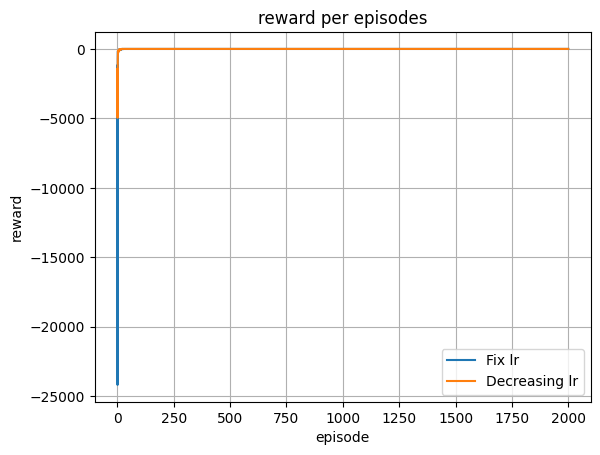

In [ ]:
plt.plot(fix_episodes, fix_rewards)
plt.plot(dec_episodes, dec_rewards)

plt.xlabel('episode')
plt.ylabel('reward')

plt.title('reward per episodes')
plt.grid()
plt.legend(["Fix lr", "Decreasing lr"])
plt.show()

<a name='2-4'></a>
### Question 10:

In [ ]:
state, _ = agent.reset()
done = False
rewards = 0
frames = []
Initial_state = env.reset(seed=STUDENT_NUM)
frames.append({'frame': env.render(),'reward': rewards,'action': 0})
while not done:
    action = agent.get_optimal_policy(state)
    next_state, reward, done = agent.take_action(action)
    state = next_state
    rewards += reward
    frames.append({'frame': env.render(),'reward': rewards,'action': action})
    if done:
        break
#print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Action: 5
Reward: 10
